# Credit Card Fraud Detection - K-Nearest Neighbor(KNN)

## Importing the Dependencies

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt

%matplotlib inline

# Loading the dataset to a Pandas DataFrame

In [5]:
df = pd.read_csv('creditcard.csv')

# First 5 rows of the dataset

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.175161e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.384974e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.094852e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.021879e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.494498e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.620335e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.149614e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.414189e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


# Dataset Information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Checking the number of missing values in each column

In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

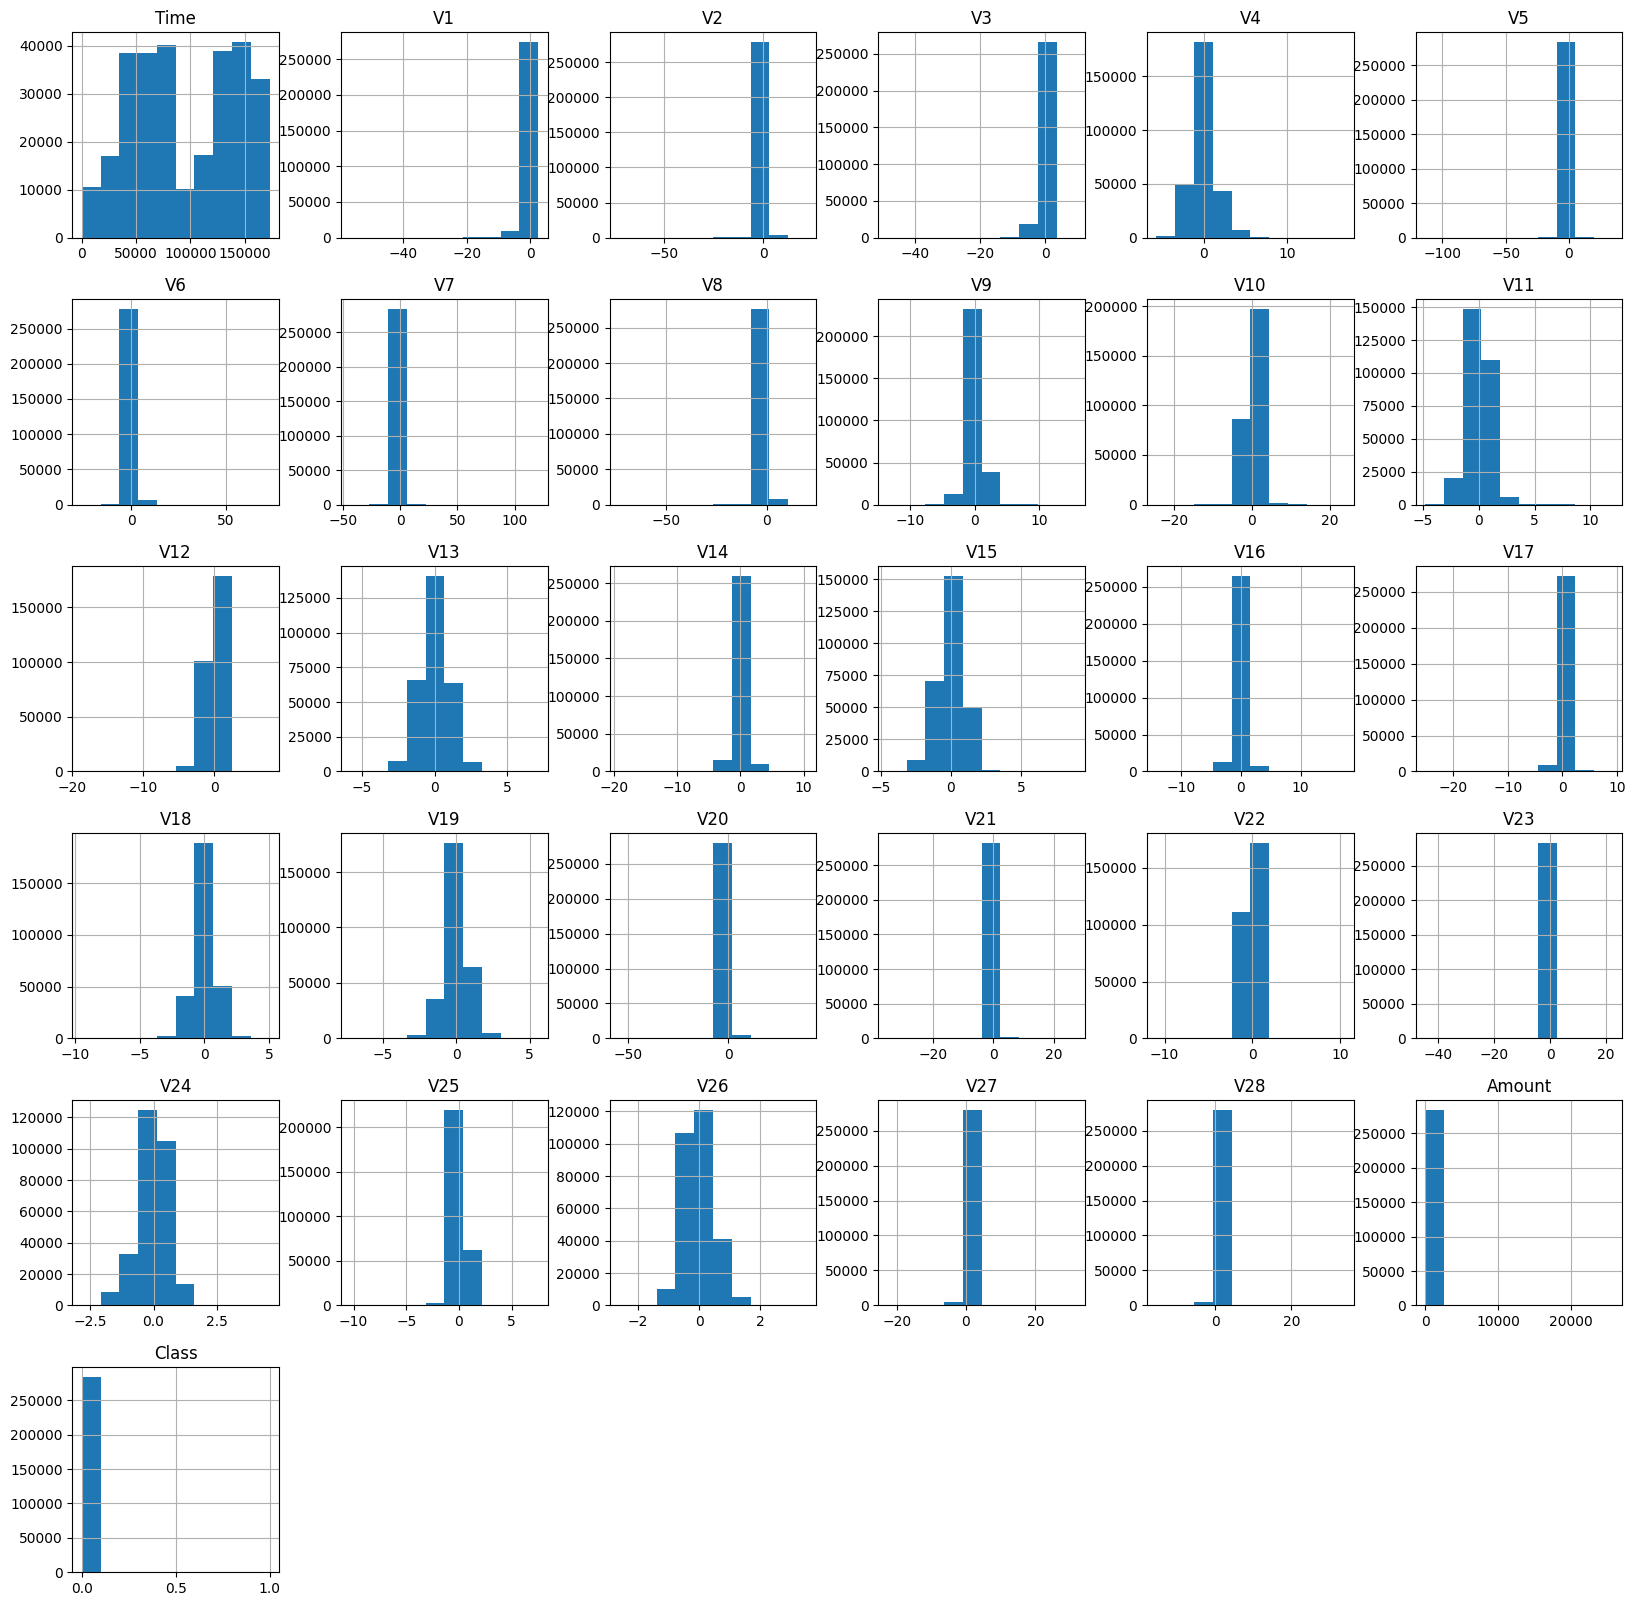

In [10]:
df.hist(figsize=(20,20))

# Standardize the Variables

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()


In [13]:
X = df.drop(["Class"], axis=1)
y = df["Class"]

In [14]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


# Undersampling

In [37]:
normal = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

In [38]:
normal.shape

(284315, 31)

In [39]:
fraud.shape

(492, 31)

In [40]:
normal_sample=normal.sample(n=492)


In [41]:
normal_sample.shape

(492, 31)

In [42]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [43]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,124997.0,2.089494,-0.874540,-1.505657,-0.877754,-0.373737,-0.020751,-1.054191,0.135974,-0.071006,...,0.254902,0.656053,0.028997,-0.024283,-0.109477,-0.103282,0.009338,-0.016797,49.90,0
1,142749.0,1.835738,-1.350734,-3.094971,-0.987883,0.387153,-0.888129,0.646027,-0.506666,-1.156967,...,0.609748,1.225377,-0.572152,-1.001294,0.738990,0.325561,-0.149532,-0.072435,261.00,0
2,76572.0,1.288561,-0.773502,1.078664,-0.588211,-1.548822,-0.457061,-1.125128,0.086527,-0.330440,...,0.429379,1.174882,-0.033616,0.439531,0.286142,-0.039187,0.048441,0.026247,22.00,0
3,71038.0,-0.596137,1.212913,1.067799,-0.180872,0.200941,-0.502955,0.561521,0.119749,-0.405030,...,-0.267241,-0.679595,-0.057317,-0.063325,-0.102643,0.080560,0.346161,0.146886,2.68,0
4,155333.0,-0.718893,1.507525,0.422692,2.672771,-0.498422,-0.163888,-0.316841,0.698234,-2.013653,...,0.118654,0.139233,0.142620,0.178903,-1.142219,2.522222,-0.316102,-0.001163,4.94,0


In [44]:
new_data['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [45]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

In [46]:
print(X)


         Time        V1        V2        V3        V4        V5        V6  \
0    124997.0  2.089494 -0.874540 -1.505657 -0.877754 -0.373737 -0.020751   
1    142749.0  1.835738 -1.350734 -3.094971 -0.987883  0.387153 -0.888129   
2     76572.0  1.288561 -0.773502  1.078664 -0.588211 -1.548822 -0.457061   
3     71038.0 -0.596137  1.212913  1.067799 -0.180872  0.200941 -0.502955   
4    155333.0 -0.718893  1.507525  0.422692  2.672771 -0.498422 -0.163888   
..        ...       ...       ...       ...       ...       ...       ...   
979  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
980  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
981  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
982  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
983  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

           V7        V8        V9  ...       V20       V21       V22  \
0  

In [47]:
print(y)


0      0
1      0
2      0
3      0
4      0
      ..
979    1
980    1
981    1
982    1
983    1
Name: Class, Length: 984, dtype: int64


## Train Test Split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

## Using KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier(n_neighbors=1)

In [52]:
knn.fit(X_train,y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [53]:
pred = knn.predict(X_test)

## Predictions and Evaluations

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
print(confusion_matrix(y_test,pred))

[[106  41]
 [ 46 103]]


In [56]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score


In [57]:
print("Accuracy SVM:", accuracy_score(y_test, pred))
print("Precision SVM:", precision_score(y_test, pred))
print("Recall SVM:", recall_score(y_test, pred))
print("F1 Score SVM:", f1_score(y_test, pred))

Accuracy SVM: 0.706081081081081
Precision SVM: 0.7152777777777778
Recall SVM: 0.6912751677852349
F1 Score SVM: 0.7030716723549488


In [58]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       147
           1       0.72      0.69      0.70       149

    accuracy                           0.71       296
   macro avg       0.71      0.71      0.71       296
weighted avg       0.71      0.71      0.71       296



In [59]:
error_rate = []

# Will take some time
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

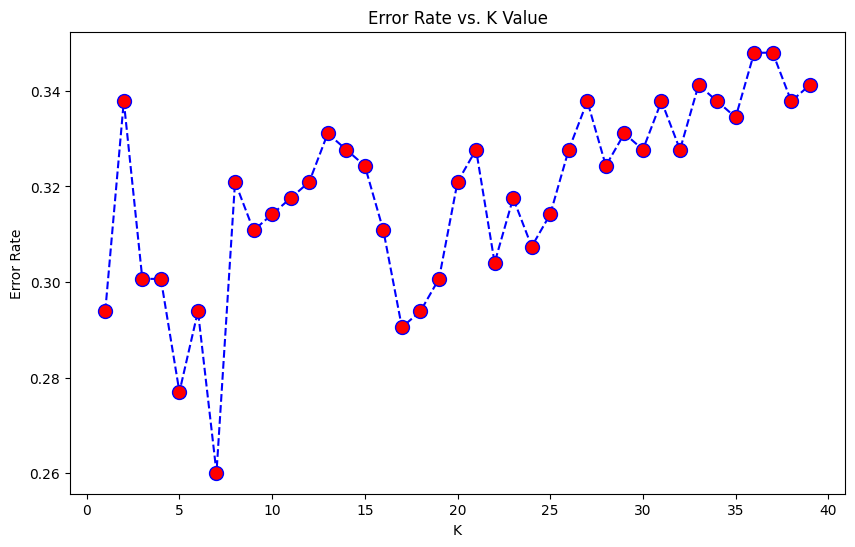

In [60]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [61]:
#Orginal K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH k=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH k=1


[[106  41]
 [ 46 103]]


              precision    recall  f1-score   support

           0       0.70      0.72      0.71       147
           1       0.72      0.69      0.70       149

    accuracy                           0.71       296
   macro avg       0.71      0.71      0.71       296
weighted avg       0.71      0.71      0.71       296



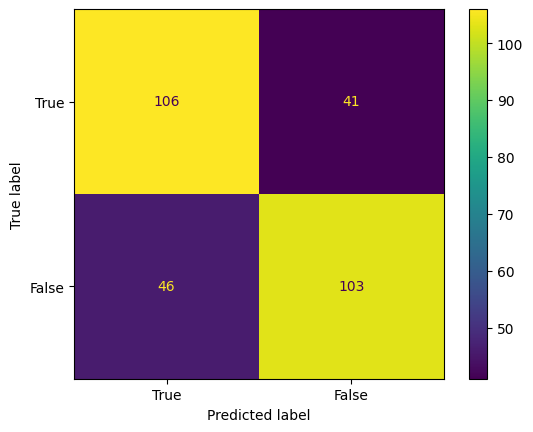

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, pred)
vis = ConfusionMatrixDisplay(confusion_matrix = conf_matrix,display_labels = [True,False])
vis.plot()
plt.grid(False)
plt.show()